# **Hyperparameter Optimisation**

## Objectives

* To perform hyperparameter optimisation for GradientBoostingClassifier and RandomForestClassifier algorithms, and model the reduced, 20 variable dataset

## Inputs

* The data file, "US_Accidents_For_ML.csv", which is saved locally in "Data/ML"

## Outputs

* The best performing model and pipeline

## Summary of Steps

* Load the dataset
* Reduce the dataset to the chosen 23 variables
* Split the dataset into train and test sets
* Perform hyperparameter optimisation for Gradient Boosting Classifier; evaluate pipeline and feature importance
* Perform hyperparameter optimisation for Random Forest Classifier; evaluate pipeline and feature importance
* Conclude which is the best performing model and why 


---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [332]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Accidents_ML_Project'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


In [333]:
os.chdir(r"c:\Users\sonia\Documents\VS Studio Projects\US_Accidents_ML_Project")

os.getcwd()

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Accidents_ML_Project'

Confirm the new current directory

In [334]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\sonia\\Documents\\VS Studio Projects\\US_Accidents_ML_Project'

---

## Required Libraries

In [335]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [336]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import QuantileTransformer
from feature_engine.transformation import YeoJohnsonTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [337]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier 

---

## Load the Dataset

I will load the dataset using Pandas.

In [338]:
df = pd.read_csv("Data/ML/US_Accidents_For_ML.csv")
pd.set_option("display.max_columns", None)
df.head()

,Severity,Start_Lat,Start_Lng,Distance(mi),Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Clearance_Class,Weather_Simplified,State_Other,Road_Type,Population,County_Other,Month
0,2,32.456486,-93.774536,0.501,Central,78.0,62.0,29.61,10.0,CALM,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,Night,Very Long,Fair,LA,Avenue,187540,Caddo,Sep
1,2,36.804693,-76.189728,0.253,Eastern,54.0,90.0,30.40,7.0,CALM,0.0,0.0,False,False,True,False,False,False,False,False,False,False,True,Night,Very Long,Fair,VA,Drive,459444,Virginia Beach,May
2,2,29.895741,-90.090026,1.154,Pacific,40.0,58.0,30.28,10.0,N,10.0,0.0,False,False,False,False,True,False,False,False,False,False,False,Day,Very Long,Cloudy,LA,Drive,440784,Jefferson,Jan
3,2,32.456459,-93.779709,0.016,Central,62.0,75.0,29.80,10.0,SSE,8.0,0.0,False,False,False,False,False,False,False,False,False,False,False,Night,Very Long,Cloudy,LA,Avenue,187540,Caddo,Nov
4,2,26.966433,-82.255414,0.057,Eastern,84.0,69.0,29.99,10.0,E,18.0,0.0,False,False,False,False,False,False,False,False,False,False,False,Day,Very Long,Cloudy,FL,Boulevard,186824,Charlotte,Sep


---

## Reduce Dataset to 20 Variables

As in the previous notebook, I will reduce to the dataset to varaibles that showed statistically significant differences in either clearance classes or clearance time.

In [339]:
keep_col = [
    "Severity",
    "Distance(mi)",
    "Start_Lat",
    "Start_Lng",
    "Timezone",
    "Temperature(F)",
    "Humidity(%)",
    "Pressure(in)",
    "Visibility(mi)",
    "Wind_Direction",
    "Wind_Speed(mph)",
    "Precipitation(in)",
    "Station",
    "Stop",
    "Traffic_Signal",
    "Sunrise_Sunset",
    "Clearance_Class",
    "Weather_Simplified",
    "State_Other",
    "Road_Type",
    "Population",
    "County_Other",
    "Month"
]

df_keep = df[keep_col].copy()
df_keep.head()

,Severity,Distance(mi),Start_Lat,Start_Lng,Timezone,Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Station,Stop,Traffic_Signal,Sunrise_Sunset,Clearance_Class,Weather_Simplified,State_Other,Road_Type,Population,County_Other,Month
0,2,0.501,32.456486,-93.774536,Central,78.0,62.0,29.61,10.0,CALM,0.0,0.0,False,False,False,Night,Very Long,Fair,LA,Avenue,187540,Caddo,Sep
1,2,0.253,36.804693,-76.189728,Eastern,54.0,90.0,30.40,7.0,CALM,0.0,0.0,False,False,True,Night,Very Long,Fair,VA,Drive,459444,Virginia Beach,May
2,2,1.154,29.895741,-90.090026,Pacific,40.0,58.0,30.28,10.0,N,10.0,0.0,False,False,False,Day,Very Long,Cloudy,LA,Drive,440784,Jefferson,Jan
3,2,0.016,32.456459,-93.779709,Central,62.0,75.0,29.80,10.0,SSE,8.0,0.0,False,False,False,Night,Very Long,Cloudy,LA,Avenue,187540,Caddo,Nov
4,2,0.057,26.966433,-82.255414,Eastern,84.0,69.0,29.99,10.0,E,18.0,0.0,False,False,False,Day,Very Long,Cloudy,FL,Boulevard,186824,Charlotte,Sep


---

# Split into Train and Test

I split the data into train and test sets.

In [ ]:
mapping = {'Short': 0, 'Moderate': 1, 'Long': 2, "Very Long": 3}
df_keep['Clearance_Class_num'] = df_keep['Clearance_Class'].map(mapping)


In [341]:
X_train, X_test, y_train, y_test = train_test_split(
    df_keep.drop(['Clearance_Class'], axis=1),
    df_keep['Clearance_Class'],
    test_size=0.2,
    random_state=0
)
print(
    "* Train set:",
    X_train.shape,
    y_train.shape,
    "\n* Test set:",
    X_test.shape,
    y_test.shape,
)

* Train set: (7974, 22) (7974,) 
* Test set: (1994, 22) (1994,)


---

## Gradient Boosting Classifier

Steps to be included in the preprocessor step:

- Encoding categorical variables
- Scaling numerical variables

Steps to be included in the pipeline:
- Preprocessor
- Feature selection
- Model selection 

In [342]:
def PipelineOptimization(model, X):
    numeric_cols = X.select_dtypes(include="number").columns.tolist()
    categorical_cols = X.select_dtypes(include="object").columns.tolist()

    numeric_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("numeric", numeric_pipeline, numeric_cols),
        ("categorical", categorical_pipeline, categorical_cols)
    ])

    steps = [("preprocessor", preprocessor)]

    # Add feature selection if the model supports it
    if hasattr(model, "coef_") or hasattr(model, "feature_importances_"):
        steps.append(("feat_selection", SelectFromModel(model)))

    steps.append(("model", model))

    pipeline = Pipeline(steps)
    return pipeline

GradientBoostingClassifier is the only algorithm this time.

In [343]:
models_search = {
    "GradientBoostingClassifier": GradientBoostingClassifier(random_state=0),
}

Below are the different hyperparameters that I will use to tune the model. The goal of tuning is to find a balance between bias and variance.

- Bias is when the model ails to capture important relationships i.e. underfitting; it shows as low training and test accuracies
- Variance measures how a model’s predictions change on different subsets of the data. High variance means to model captured noise in the training data and generalises poorly i.e. overfitting; it shows as high training accuracy but much lower test accuracy 

I chosen to tune the following hyperparameters which are likely to impact accuracy scores:

- learning_rate - Controls how much each tree contributes to correcting the errors of the previous ensemble; low values take more time, but these small adjustments tend to reduce overfitting
- n_estimators - The number of boosting stages trees to fit; too little, the model stops learning too early, leading to underfitting (high bias); too many reduces training error but but fits noise, can lead to overfitting (high variance) 
- max_depth - Controls how complex each individual tree is; low values mean it can learn simple patterns only, leading to good generalisation, but could underfit; high value means it can learn complex patterns between features, it will fit the training data better but could overfit 
- min_samples_split - Minimum samples (rows) needed to split a node; larger values means simpler trees and potentially underfitting; smaller values mean complex tress and possible overfitting
- min_samples_leaf - Minimum samples (rows) per leaf (terminal branch); too high mean less detail and potentially underfitting; too low means a highly detailed model which could be overfitted 
- subsample - Controls how much of the training data each tree is allowed to see, 1 = 100 %; introduces randomness which reduces variance but can increases bias

Note, I have tried various combinations and these are the final parameters that I am testing.

In [344]:
params_search = {
    "GradientBoostingClassifier": {
        "model__learning_rate": [0.05],
        "model__n_estimators": [100],
        "model__max_depth": [7],
        "model__min_samples_split": [5, 10],
        "model__min_samples_leaf": [10, 20],
        "model__subsample": [0.8],
    }
}

In [345]:
class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = list(models.keys())
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model_pipeline = PipelineOptimization(self.models[key], X)
            params = self.params[key]
            gs = GridSearchCV(model_pipeline, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, refit=True)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, scores, params):
            d = {
                'estimator': key,
                'min_score': min(scores),
                'max_score': max(scores),
                'mean_score': np.mean(scores),
                'std_score': np.std(scores),
            }
            return pd.Series({**params, **d})

        rows = []
        for k in self.grid_searches:
            gs = self.grid_searches[k]
            params = gs.cv_results_['params']
            all_scores = gs.cv_results_['mean_test_score']
            for p, s in zip(params, all_scores):
                rows.append(row(k, [s], p))

        df = pd.concat(rows, axis=1).T.sort_values([sort_by], ascending=False)
        columns = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        columns += [c for c in df.columns if c not in columns]
        return df[columns], self.grid_searches

I fit each model to the data.

In [346]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(
    X_train, y_train,
    scoring='accuracy',
    n_jobs=-1,
    cv=2,
    refit=True
)


Running GridSearchCV for GradientBoostingClassifier 

Fitting 2 folds for each of 4 candidates, totalling 8 fits


Then output a summary table to see the performance of each model.

In [347]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__learning_rate,model__max_depth,model__min_samples_leaf,model__min_samples_split,model__n_estimators,model__subsample
0,GradientBoostingClassifier,0.604465,0.604465,0.604465,0.0,0.05,7,10,5,100,0.8
1,GradientBoostingClassifier,0.604465,0.604465,0.604465,0.0,0.05,7,10,10,100,0.8
2,GradientBoostingClassifier,0.599197,0.599197,0.599197,0.0,0.05,7,20,5,100,0.8
3,GradientBoostingClassifier,0.599197,0.599197,0.599197,0.0,0.05,7,20,10,100,0.8


## Fit the Best Performing Model to the Data

I grab the best model, which here, of course, will be GradientBoostingClassifier.

In [348]:
best_model = grid_search_summary.iloc[0,0]
best_model

'GradientBoostingClassifier'

I also grab the best hyperparameters.

In [349]:
grid_search_pipelines[best_model].best_params_

{'model__learning_rate': 0.05,
 'model__max_depth': 7,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 5,
 'model__n_estimators': 100,
 'model__subsample': 0.8}

Then set the final model with best model and hyperparameters.

In [350]:
best_pipeline = grid_search_pipelines[best_model].best_estimator_
best_pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Evaluate the Model

This function produces a confusion matrix, which shows the number of actual values for each class against the number of predicted values, and the classification report, which describes how the model performed using different metrics.

In [357]:
def confusion_matrix_and_report(X, y, pipeline, label_order):
    prediction = pipeline.predict(X)

    # Use string labels directly
    labels = label_order
    label_names = label_order

    # --- Confusion Matrix ---
    cm = confusion_matrix(y, prediction, labels=labels)
    print('---  Confusion Matrix  ---')
    print(pd.DataFrame(
        cm,
        columns=[f"Predicted {name}" for name in label_names],
        index=[f"Actual {name}" for name in label_names]
    ))
    print("\n")

    # --- Classification Report ---
    print('---  Classification Report  ---')
    print(classification_report(y, prediction, labels=labels, target_names=label_names))
    print("\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_order):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_order)

    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_order)


Here, I run an instance of the function above to generate the confusion matrix and performance report for the model fitted.

In [358]:
label_order = ['Short', 'Moderate', 'Long', 'Very Long']

clf_performance(
    X_train=X_train, 
    y_train=y_train,
    X_test=X_test, 
    y_test=y_test,
    pipeline=best_pipeline,
    label_order=label_order
)

#### Train Set #### 

---  Confusion Matrix  ---
                  Predicted Short  Predicted Moderate  Predicted Long  \
Actual Short                 1734                 149             207   
Actual Moderate               391                1330             332   
Actual Long                    53                 226            1768   
Actual Very Long               17                 165             177   

                  Predicted Very Long  
Actual Short                       31  
Actual Moderate                    61  
Actual Long                        65  
Actual Very Long                 1268  


---  Classification Report  ---
              precision    recall  f1-score   support

       Short       0.79      0.82      0.80      2121
    Moderate       0.71      0.63      0.67      2114
        Long       0.71      0.84      0.77      2112
   Very Long       0.89      0.78      0.83      1627

    accuracy                           0.76      7974
   macro avg       0.78  

At the top is the confusion matrix and performance report for the train set, and below is the same for the test set. The performance metrics are:
- precision: of those that were predicted to belong to a class, what proportion were correct 

    = True Positive/ (True Positive + False Positive)
- recall: of those that actually belong to a class, what proportion were predicted correctly 

    = True Positive/ (True Positive + True Negative)
- f1-score: is the hormonic mean of precision and recall - combined metric
- support: how many samples/ rows belog to that class
- accuracy: overall proportion of correct predictions
- macro avg: average of each metric across all classes
- weighted avg: average of each metric weighted by class frequency  

**Overall Performance**

Train set accuracy: 0.76

Test set accuracy: 0.61

Macro-average F1-score: 0.76 (train) vs 0.61 (test)

The model does reasonably well on the training data but shows a drop on the test data, suggesting moderate overfitting. The drop is not extreme, so it has learned some generalisable patterns.

**Class-wise Performance**

Looking at precision, recall, and F1-score per class:

Short - Precision and recall very similar; some misclassification into other classes, but only 8 into *Very Long*; f1-score = 0.68        
Moderate - Model struggles to identify this class correctly, likely due to overlapping features; f1-score = 0.46
Long - Model struggles to identiy this class also, but does better compared to *Moderate*; f1-score = 0.61
Very Long - Best-performing class; precision is greater than recall; 12 incidents misidentified as *Short*; f1-score = 0.72

*Moderate* and *Long* are the hardest classes to distinguish, possibly because their feature distributions overlap.

*Short* and *Very Long* are predicted more reliably.

**Bias vs Variance**

Train F1-score > Test F1-score across all classes → some overfitting (variance is moderate).

Test F1-score ~0.61 macro → model generalizes reasonably but could benefit from more data or feature engineering.

**Summary**

The Gradient Boosting Classifier was tuned to reduce variance. It achieves decent performance, especially on *Short* and *Very Long* clearance times, but struggles with intermediate classes (*Moderate* and *Long*). There’s moderate overfitting as shown by the higher training scores compared to the test set. Overall, the model captures general patterns in the data, with room for improvement in distinguishing classes that are close together.

## Important Features

Feature importance (.feature_importance_) gives the relative importance (or weight) of each feature in the model — that is, how much each feature contributed to reducing error across all trees. A higher value means the feature is used more often and provides more information.

The sum of all importances = 1, so it can be thought of as the proportion each feature contributes to the model.


* Top 20 features:

           Feature  Importance
      Distance(mi)    0.297815
       State_Other    0.141364
         Start_Lat    0.080507
         Start_Lng    0.079771
      County_Other    0.073146
      Pressure(in)    0.060641
        Population    0.058392
    Temperature(F)    0.039346
       Humidity(%)    0.030759
          Severity    0.029488
             Month    0.025300
   Wind_Speed(mph)    0.020393
    Wind_Direction    0.013187
         Road_Type    0.013051
Weather_Simplified    0.010905
    Sunrise_Sunset    0.009403
    Visibility(mi)    0.007101
          Timezone    0.005900
 Precipitation(in)    0.003531


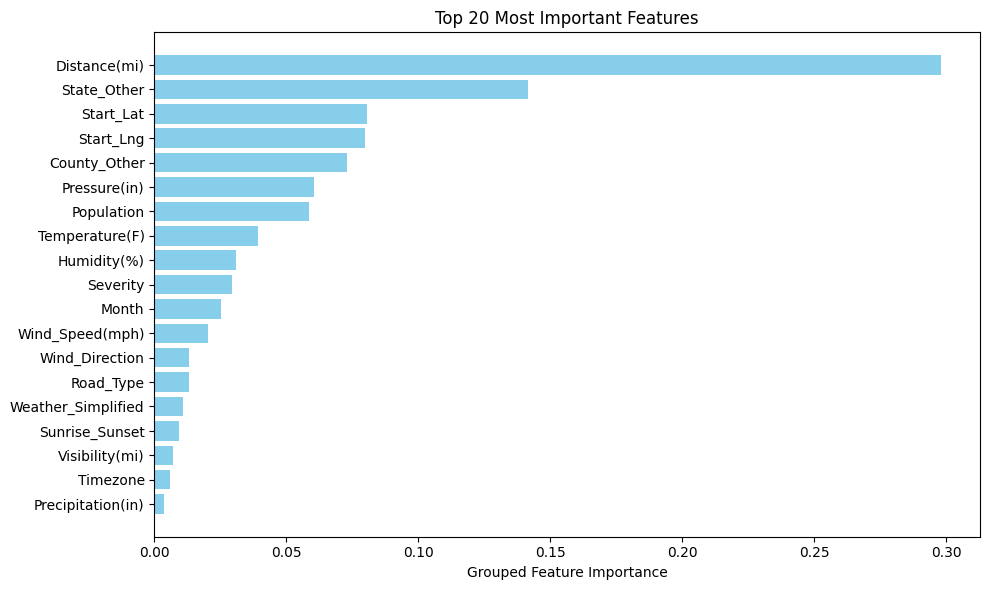

In [360]:
preprocessor = best_pipeline.named_steps['preprocessor']

all_feature_names = []

for name, transformer, cols in preprocessor.transformers_:
    if name == 'categorical':
        # Get OHE feature names
        ohe = transformer.named_steps['onehot']
        ohe_names = ohe.get_feature_names_out(cols)
        all_feature_names.extend(ohe_names)
    else:
        # numeric transformer
        all_feature_names.extend(cols)

# Sometimes ColumnTransformer adds a 'remainder' with dropped columns
if hasattr(preprocessor, 'remainder') and preprocessor.remainder != 'drop':
    remainder_cols = [c for c in X_train.columns if c not in sum([list(t[2]) for t in preprocessor.transformers_], [])]
    all_feature_names.extend(remainder_cols)

# Get model importances
importances = best_pipeline.named_steps['model'].feature_importances_

# Group by original column
grouped_importance = {}
for f, imp in zip(all_feature_names, importances):
    col_found = False
    for cat_col in preprocessor.transformers_[1][2]:  # categorical columns
        if f.startswith(cat_col + "_"):
            col = cat_col
            col_found = True
            break
    if not col_found:
        col = f
    grouped_importance[col] = grouped_importance.get(col, 0) + imp

df_grouped = pd.DataFrame({
    "Feature": list(grouped_importance.keys()),
    "Importance": list(grouped_importance.values())
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Top 20 print
top_n = 20
print(f"\n* Top {top_n} features:\n")
print(df_grouped.head(top_n).to_string(index=False))

# Top 20 plot
plt.figure(figsize=(10,6))
plt.barh(df_grouped.head(top_n)["Feature"][::-1], 
         df_grouped.head(top_n)["Importance"][::-1], 
         color="skyblue")
plt.xlabel("Grouped Feature Importance")
plt.title(f"Top {top_n} Most Important Features")
plt.tight_layout()
plt.show()

In line with outcomes in EDA, I can see that features describing location; "Start_Lat", "Start_Lng", "State_Other" and "County_Other" contribute highly to the model.

"Distance(mi)" is the highest contributor overall, and was found to have the most statistically significant differences in distribution according to clearance class.

---

## Random Forest Classifier

In [361]:
def PipelineOptimization(model, X):
    numeric_cols = X.select_dtypes(include="number").columns.tolist()
    categorical_cols = X.select_dtypes(include="object").columns.tolist()

    numeric_pipeline = Pipeline([
        ("scaler", StandardScaler())
    ])

    categorical_pipeline = Pipeline([
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False))
    ])

    preprocessor = ColumnTransformer(transformers=[
        ("numeric", numeric_pipeline, numeric_cols),
        ("categorical", categorical_pipeline, categorical_cols)
    ])

    steps = [("preprocessor", preprocessor)]

    # Add feature selection if the model supports it
    if hasattr(model, "coef_") or hasattr(model, "feature_importances_"):
        steps.append(("feat_selection", SelectFromModel(model)))

    steps.append(("model", model))

    pipeline = Pipeline(steps)
    return pipeline

In [362]:
models_search = {
    "RandomForestClassifier": RandomForestClassifier(random_state=0),
}

For this algorithm, I am tuning the following hyperparameters:
- n_estimators - Number of trees in the forest; too few → underfitting (high bias); too many → slower, diminishing returns
- max_depth -How deep each tree can grow; shallow trees underfit; deep trees can overfit
- min_samples_split - Minimum samples (rows) needed to split a node; larger values → simpler trees → less overfitting
- min_samples_leaf - Minimum samples (rows) per leaf (terminal branch); higher values → smooth predictions, reduce variance
- max_features - How many features are considered at each split; Smaller → more random, less correlated trees → less overfitting

In [373]:
params_search = {
    "RandomForestClassifier": {
        'model__n_estimators': [600],
        'model__max_depth': [30],
        'model__min_samples_split': [10],
        'model__min_samples_leaf': [10, 20],             
        'model__max_features': ['sqrt', 0.5],  
        }
}

In [364]:
class HyperparameterOptimizationSearch:

    def __init__(self, models, params):
        self.models = models
        self.params = params
        self.keys = list(models.keys())
        self.grid_searches = {}

    def fit(self, X, y, cv, n_jobs, verbose=1, scoring=None, refit=False):
        for key in self.keys:
            print(f"\nRunning GridSearchCV for {key} \n")
            model_pipeline = PipelineOptimization(self.models[key], X)
            params = self.params[key]
            gs = GridSearchCV(model_pipeline, params, cv=cv, n_jobs=n_jobs, verbose=verbose, scoring=scoring, refit=True)
            gs.fit(X, y)
            self.grid_searches[key] = gs

    def score_summary(self, sort_by='mean_score'):
        def row(key, score, params):
            d = {
                'estimator': key,
                'min_score': score,
                'max_score': score,
                'mean_score': score,
                'std_score': 0.0
            }
            # Merge hyperparameters
            return pd.Series({**d, **params})

        rows = []
        for k in self.grid_searches:
            gs = self.grid_searches[k]
            params_list = gs.cv_results_['params']
            scores = gs.cv_results_['mean_test_score']
            for p, s in zip(params_list, scores):
                rows.append(row(k, s, p))

        df = pd.DataFrame(rows)
        # Sort and order columns
        base_cols = ['estimator', 'min_score', 'mean_score', 'max_score', 'std_score']
        other_cols = [c for c in df.columns if c not in base_cols]
        df = df[base_cols + other_cols].sort_values(sort_by, ascending=False)
        return df, self.grid_searches


In [374]:
search = HyperparameterOptimizationSearch(models=models_search, params=params_search)
search.fit(
    X_train, y_train,
    scoring='accuracy',
    n_jobs=-1,
    cv=2,
    refit=True
)


Running GridSearchCV for RandomForestClassifier 

Fitting 2 folds for each of 4 candidates, totalling 8 fits


In [375]:
grid_search_summary, grid_search_pipelines = search.score_summary(sort_by='mean_score')
grid_search_summary

,estimator,min_score,mean_score,max_score,std_score,model__max_depth,model__max_features,model__min_samples_leaf,model__min_samples_split,model__n_estimators
2,RandomForestClassifier,0.599824,0.599824,0.599824,0.0,30,0.5,10,10,600
3,RandomForestClassifier,0.595686,0.595686,0.595686,0.0,30,0.5,20,10,600
0,RandomForestClassifier,0.584148,0.584148,0.584148,0.0,30,sqrt,10,10,600
1,RandomForestClassifier,0.575495,0.575495,0.575495,0.0,30,sqrt,20,10,600


## Best Model

Now I can grab the best performing model.

In [376]:
best_model = grid_search_summary.iloc[0,0]
best_model

'RandomForestClassifier'

Followed by the best performing hyperparameters.

In [377]:
grid_search_pipelines[best_model].best_params_

{'model__max_depth': 30,
 'model__max_features': 0.5,
 'model__min_samples_leaf': 10,
 'model__min_samples_split': 10,
 'model__n_estimators': 600}

Then set the final pipeline with these parameters in place.

In [378]:
best_pipeline = grid_search_pipelines[best_model].best_estimator_
best_pipeline

,steps,"[('preprocessor', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('numeric', ...), ('categorical', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


## Pipeline Evaluation

I will evaluate the model performance using a confusion matrix and performance report.

In [379]:
def confusion_matrix_and_report(X, y, pipeline, label_order):
    prediction = pipeline.predict(X)

    # Use string labels directly
    labels = label_order
    label_names = label_order

    # --- Confusion Matrix ---
    cm = confusion_matrix(y, prediction, labels=labels)
    print('---  Confusion Matrix  ---')
    print(pd.DataFrame(
        cm,
        columns=[f"Predicted {name}" for name in label_names],
        index=[f"Actual {name}" for name in label_names]
    ))
    print("\n")

    # --- Classification Report ---
    print('---  Classification Report  ---')
    print(classification_report(y, prediction, labels=labels, target_names=label_names))
    print("\n")


def clf_performance(X_train, y_train, X_test, y_test, pipeline, label_order):
    print("#### Train Set #### \n")
    confusion_matrix_and_report(X_train, y_train, pipeline, label_order)

    print("#### Test Set ####\n")
    confusion_matrix_and_report(X_test, y_test, pipeline, label_order)


In [380]:
label_order = ['Short', 'Moderate', 'Long', 'Very Long']

clf_performance(
    X_train=X_train, 
    y_train=y_train,
    X_test=X_test, 
    y_test=y_test,
    pipeline=best_pipeline,
    label_order=label_order
)

#### Train Set #### 

---  Confusion Matrix  ---
                  Predicted Short  Predicted Moderate  Predicted Long  \
Actual Short                 1680                 178             220   
Actual Moderate               452                1254             327   
Actual Long                    57                 199            1776   
Actual Very Long               26                 195             182   

                  Predicted Very Long  
Actual Short                       43  
Actual Moderate                    81  
Actual Long                        80  
Actual Very Long                 1224  


---  Classification Report  ---
              precision    recall  f1-score   support

       Short       0.76      0.79      0.77      2121
    Moderate       0.69      0.59      0.64      2114
        Long       0.71      0.84      0.77      2112
   Very Long       0.86      0.75      0.80      1627

    accuracy                           0.74      7974
   macro avg       0.75  

**Overall Accuracy**

Train macro avg F1 ≈ 0.75    
Test macro avg F1 ≈ 0.61
Indicates moderate variance — some overfitting, but the model generalizes reasonably well.

Overall accuracy: ~60% on the test set across 4 classes.
This is much higher than random chance (25%), showing the model captures real signal.

**Class performance**

*Short* and *Very Long* classes perform best (F1 = 0.69 – 0.71). This model incorrectly identifies 1 less incident as *Very Long* when it is *Short*, however, it misidentifies 2 more actual *Very Long* incidents as *Short*. 

*Moderate* remains hardest to classify (F1 = 0.45 - 0.59) — likely due to overlap with adjacent classes.

*Very Long* shows strong precision and decent recall (0.77 and 0.67 respectively), meaning the model identifies most of these correctly with few false positives.

**Interpretation**
The model effectively distinguishes extremes (*Short* vs. *Very Long*), but intermediate classes (*Moderate*, *Long*) are harder to separate — likely reflecting overlapping patterns in the underlying features.

**Summary**

The final Random Forest Classifier achieved a test accuracy of 61% (macro F1 = 0.61), indicating moderate predictive power across the four clearance time classes. It performs best on the *Short* and *Very Long* categories, with more confusion between the *Moderate* and *Long* classes. Overall, the model generalizes fairly well, balancing bias and variance given the complexity of the task.

## Most Important Features

Now, I will look at the most important features that contribute to the model.


* Top 20 features:

           Feature  Importance
      Distance(mi)    0.316161
       State_Other    0.138712
         Start_Lat    0.073506
         Start_Lng    0.069363
      County_Other    0.067736
      Pressure(in)    0.058231
        Population    0.056923
    Temperature(F)    0.043872
       Humidity(%)    0.037288
          Timezone    0.025887
          Severity    0.025582
   Wind_Speed(mph)    0.021921
             Month    0.016464
         Road_Type    0.013465
    Sunrise_Sunset    0.010268
Weather_Simplified    0.010233
    Wind_Direction    0.007944
    Visibility(mi)    0.004887
 Precipitation(in)    0.001558


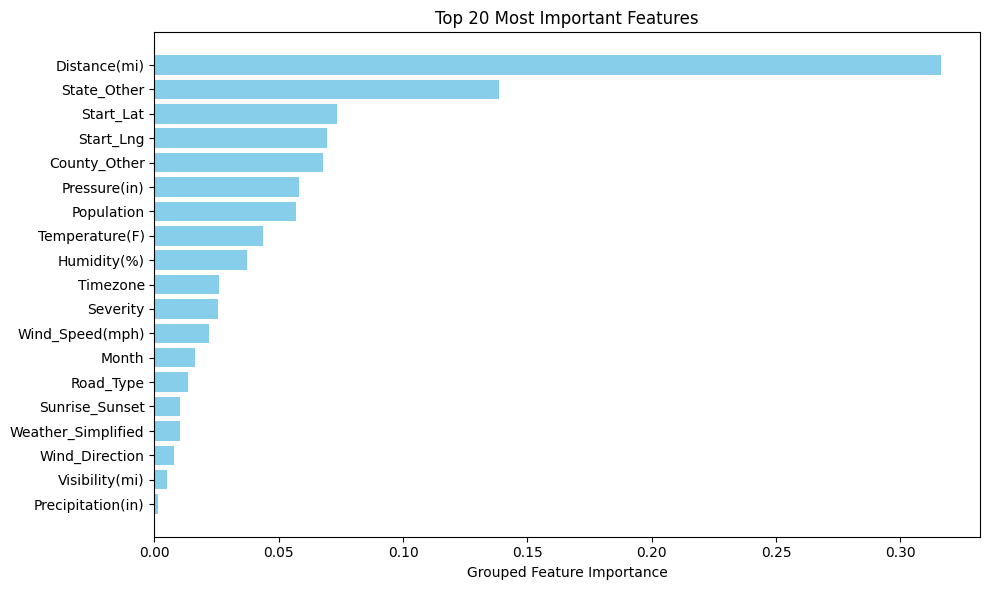

In [381]:
preprocessor = best_pipeline.named_steps['preprocessor']

all_feature_names = []

for name, transformer, cols in preprocessor.transformers_:
    if name == 'categorical':
        # Get OHE feature names
        ohe = transformer.named_steps['onehot']
        ohe_names = ohe.get_feature_names_out(cols)
        all_feature_names.extend(ohe_names)
    else:
        # numeric transformer
        all_feature_names.extend(cols)

# Sometimes ColumnTransformer adds a 'remainder' with dropped columns
if hasattr(preprocessor, 'remainder') and preprocessor.remainder != 'drop':
    remainder_cols = [c for c in X_train.columns if c not in sum([list(t[2]) for t in preprocessor.transformers_], [])]
    all_feature_names.extend(remainder_cols)

# Get model importances
importances = best_pipeline.named_steps['model'].feature_importances_

# Group by original column
grouped_importance = {}
for f, imp in zip(all_feature_names, importances):
    col_found = False
    for cat_col in preprocessor.transformers_[1][2]:  # categorical columns
        if f.startswith(cat_col + "_"):
            col = cat_col
            col_found = True
            break
    if not col_found:
        col = f
    grouped_importance[col] = grouped_importance.get(col, 0) + imp

df_grouped = pd.DataFrame({
    "Feature": list(grouped_importance.keys()),
    "Importance": list(grouped_importance.values())
}).sort_values(by="Importance", ascending=False).reset_index(drop=True)

# Top 20 print
top_n = 20
print(f"\n* Top {top_n} features:\n")
print(df_grouped.head(top_n).to_string(index=False))

# Top 20 plot
plt.figure(figsize=(10,6))
plt.barh(df_grouped.head(top_n)["Feature"][::-1], 
         df_grouped.head(top_n)["Importance"][::-1], 
         color="skyblue")
plt.xlabel("Grouped Feature Importance")
plt.title(f"Top {top_n} Most Important Features")
plt.tight_layout()
plt.show()

The feature importances from this Random Forest Classifier model are extremely similar to those of the Gradient Boosting Classifier. The closeness of the two model, in terms of performance report and feature importance, gives me some confidence that this is likely as good a model that can be made with the data.

---

## Conclusion and Next Steps

- Both models performed reasonably well but show moderate overfitting
- Gradient Boosting Classifier will be the model taken forward, because it misidentified 2 less incidents as *Short* when they were actually *Ver Long* - this was an important criteria of the project brief
- Steps to try and improve the model include: improved feature engineering, additional data and emsemble learning techniques  

---